In [2]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt
#!pip unfreeze requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('display.max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.24.4
1.3.0


In [3]:
%%time
%env
print("Hellow World")

Hellow World
CPU times: total: 0 ns
Wall time: 0 ns


In [4]:
# Standard Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

#  Find and Load a Large Dataset
Deliverable: The dataset London_Bus_Weather_Lambda.csv was loaded using the following code:

In [5]:
df = pd.read_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\makeovermonday-2018w51\data\tfl_bus_safety.csv")

# Perform a Structural Investigation
Deliverable: The dataset contains 24 columns and over 10,000 rows. The info() and nunique() methods were used to investigate the structure and uniqueness of the data. Data types were validated, with most columns being of type object, and some columns like year, max_temp, and mean_temp being of type int64 and float64 respectively.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [7]:
df.nunique()

year                           4
date_of_incident              45
route                        612
operator                      25
group_name                    14
bus_garage                    84
borough                       35
injury_result_description      4
incident_event_type           10
victim_category               17
victims_sex                    3
victims_age                    5
dtype: int64

# Perform a Quality Investigation
Deliverable: The dataset was cleaned by removing duplicates, renaming and dropping unnecessary columns, treating datetime columns, and handling missing values. The cleaned dataset was saved as London_Bus_Weather_Cleaned.csv.

## Remove Duplicates

In [8]:
# Check for duplicates
duplicates = df.duplicated()

duplicate_count = duplicates.sum()
print(duplicate_count)

1694


In [9]:
df = df.drop_duplicates()

In [10]:
# Check for duplicates
duplicates = df.duplicated()

duplicate_count = duplicates.sum()
print(duplicate_count)

0


## Handling Missing Values

In [11]:
df.isnull().sum()

year                         0
date_of_incident             0
route                        0
operator                     0
group_name                   0
bus_garage                   0
borough                      0
injury_result_description    0
incident_event_type          0
victim_category              0
victims_sex                  0
victims_age                  0
dtype: int64

## Treat Datetimes

In [12]:
# Convert the column to datetime
df['date_of_incident'] = pd.to_datetime(df['date_of_incident'])

# Check the data types to confirm the conversion
print(df.dtypes)

year                                  int64
date_of_incident             datetime64[ns]
route                                object
operator                             object
group_name                           object
bus_garage                           object
borough                              object
injury_result_description            object
incident_event_type                  object
victim_category                      object
victims_sex                          object
victims_age                          object
dtype: object


In [13]:
# Convert the column to integer
df['year'] = df['year'].astype(int)

# Check the data types to confirm the conversion
print(df.dtypes)

year                                  int32
date_of_incident             datetime64[ns]
route                                object
operator                             object
group_name                           object
bus_garage                           object
borough                              object
injury_result_description            object
incident_event_type                  object
victim_category                      object
victims_sex                          object
victims_age                          object
dtype: object


In [14]:
df.apply(pd.unique)

year                                                  [2015, 2016, 2017, 2018]
date_of_incident             [2015-01-01T00:00:00.000000000, 2015-04-01T00:...
route                        [1, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18,...
operator                     [London General, Metroline, East London, Selke...
group_name                   [Go-Ahead, Metroline, Stagecoach, London Unite...
bus_garage                   [Garage Not Available, Mandela Way (London Gen...
borough                      [Southwark, Islington, Havering, None London B...
injury_result_description    [Injuries treated on scene, Taken to Hospital ...
incident_event_type          [Onboard Injuries, Collision Incident, Assault...
victim_category              [Passenger, Pedestrian, Conductor, Bus Driver,...
victims_sex                                            [Male, Female, Unknown]
victims_age                            [Child, Unknown, Elderly, Adult, Youth]
dtype: object

In [15]:
df.to_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Visualization\Projects\project 2\London_Bus_Safety_Performance_Cleaned_Data.csv", index=False)

# Merge with a Second DataFrame
Deliverable: A secondary dataset containing additional information about bus routes was merged with the primary dataset using a left join on the route column. The merged dataset was saved as London_Bus_Weather_Merged.csv.

In [16]:
df.head(10)

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
5,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Elderly
6,2015,2015-01-01,8,Selkent,Stagecoach,Garage Not Available,City of London,Injuries treated on scene,Onboard Injuries,Passenger,Male,Adult
7,2015,2015-01-01,9,London United,London United,Garage Not Available,Hammersmith & Fulham,Injuries treated on scene,Onboard Injuries,Conductor,Unknown,Unknown
8,2015,2015-01-01,10,London United,London United,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Female,Elderly
9,2015,2015-01-01,11,London General,Go-Ahead,Garage Not Available,City of London,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Female,Adult


## London Weather Data

In [17]:
df_weather = pd.read_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\london_weather.csv")

### Quick Cleaning of London Weather Data before merging

In [18]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [19]:
df_weather.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [20]:
# Convert 'date' column to datetime object
#df_weather['date'] = df_weather['date'].apply(lambda x: datetime.strptime(x, '%Y%m%d').date())

#print(df_weather)

# Assuming df_weather['date'] is in the format '19790101'
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y%m%d')

# Check the result
print(df_weather.dtypes)
print(df_weather)

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object
            date  cloud_cover  sunshine  global_radiation  max_temp  \
0     1979-01-01          2.0       7.0              52.0       2.3   
1     1979-01-02          6.0       1.7              27.0       1.6   
2     1979-01-03          5.0       0.0              13.0       1.3   
3     1979-01-04          8.0       0.0              13.0      -0.3   
4     1979-01-05          6.0       2.0              29.0       5.6   
...          ...          ...       ...               ...       ...   
15336 2020-12-27          1.0       0.9              32.0       7.5   
15337 2020-12-28          7.0       3.7              38.0       3.6 

In [21]:
df_weather.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,2020-12-31,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [22]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [23]:
# Assuming df_weather['date'] is in the format '2020-12-27'
#df_weather['date'] = pd.to_datetime(df_weather['date'])

# Check the result
#print(df_weather.dtypes)
#print(df_weather)


In [24]:
df_weather.nunique()

date                15341
cloud_cover            10
sunshine              160
global_radiation      360
max_temp              374
mean_temp             321
min_temp              296
precipitation         262
pressure              642
snow_depth             19
dtype: int64

In [25]:
# Check for duplicates
duplicates = df_weather.duplicated()

duplicate_count = duplicates.sum()
print(duplicate_count)

0


In [26]:
df_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [27]:
df_weather.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,2020-12-31,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [28]:
df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


### Merge

In [29]:
# Merge 'df' with 'df_weather' on the date columns
# We are using 'left' join to keep all records from 'df' and merge with 'df_weather'
merged_df = pd.merge(df, df_weather, left_on='date_of_incident', right_on='date', how='left')

In [30]:
merged_df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21464 entries, 0 to 21463
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       21464 non-null  int32         
 1   date_of_incident           21464 non-null  datetime64[ns]
 2   route                      21464 non-null  object        
 3   operator                   21464 non-null  object        
 4   group_name                 21464 non-null  object        
 5   bus_garage                 21464 non-null  object        
 6   borough                    21464 non-null  object        
 7   injury_result_description  21464 non-null  object        
 8   incident_event_type        21464 non-null  object        
 9   victim_category            21464 non-null  object        
 10  victims_sex                21464 non-null  object        
 11  victims_age                21464 non-null  object        
 12  date

### Saving as another CSV with a different name

In [32]:
merged_df.to_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\London_Bus_Weather_Merge.csv", index=False)

# Data Binning
Deliverable: The mean_temp column was binned into categories such as 'Cold', 'Mild', and 'Warm' based on temperature ranges. The updated dataset with binned data was saved as London_Bus_Weather_Binned.csv.

In [33]:
merged_df.tail()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
21459,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,2018-09-01,0.0,12.2,231.0,24.8,18.1,11.8,0.0,102530.0,0.0
21460,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,2018-09-01,0.0,12.2,231.0,24.8,18.1,11.8,0.0,102530.0,0.0
21461,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult,2018-09-01,0.0,12.2,231.0,24.8,18.1,11.8,0.0,102530.0,0.0
21462,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,2018-09-01,0.0,12.2,231.0,24.8,18.1,11.8,0.0,102530.0,0.0
21463,2018,2018-09-01,(blank),Metroline,Metroline,Holloway,Islington,Injuries treated on scene,Personal Injury,Other,Unknown,Unknown,2018-09-01,0.0,12.2,231.0,24.8,18.1,11.8,0.0,102530.0,0.0


In [34]:
merged_df.nunique()

year                           4
date_of_incident              45
route                        612
operator                      25
group_name                    14
bus_garage                    84
borough                       35
injury_result_description      4
incident_event_type           10
victim_category               17
victims_sex                    3
victims_age                    5
date                          45
cloud_cover                    9
sunshine                      31
global_radiation              37
max_temp                      39
mean_temp                     40
min_temp                      39
precipitation                 12
pressure                      44
snow_depth                     1
dtype: int64

In [35]:
# Define the mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Extract the month from the date and map it to the season
merged_df['season'] = pd.to_datetime(merged_df['date_of_incident']).dt.month.map(month_to_season)

# Check the result
print(merged_df)

       year date_of_incident    route        operator     group_name  \
0      2015       2015-01-01        1  London General       Go-Ahead   
1      2015       2015-01-01        4       Metroline      Metroline   
2      2015       2015-01-01        5     East London     Stagecoach   
3      2015       2015-01-01        5     East London     Stagecoach   
4      2015       2015-01-01        6       Metroline      Metroline   
...     ...              ...      ...             ...            ...   
21459  2018       2018-09-01  (blank)     East London     Stagecoach   
21460  2018       2018-09-01  (blank)   London United  London United   
21461  2018       2018-09-01  (blank)   London United  London United   
21462  2018       2018-09-01  (blank)   London United  London United   
21463  2018       2018-09-01  (blank)       Metroline      Metroline   

                 bus_garage               borough  \
0      Garage Not Available             Southwark   
1      Garage Not Available  

In [36]:
merged_df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,season
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21464 entries, 0 to 21463
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       21464 non-null  int32         
 1   date_of_incident           21464 non-null  datetime64[ns]
 2   route                      21464 non-null  object        
 3   operator                   21464 non-null  object        
 4   group_name                 21464 non-null  object        
 5   bus_garage                 21464 non-null  object        
 6   borough                    21464 non-null  object        
 7   injury_result_description  21464 non-null  object        
 8   incident_event_type        21464 non-null  object        
 9   victim_category            21464 non-null  object        
 10  victims_sex                21464 non-null  object        
 11  victims_age                21464 non-null  object        
 12  date

In [38]:
merged_df.to_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\London_Bus_Weather_Merge_and_Bin.csv", index=False)

# Lambda Function Application
Deliverable: A lambda function was used to create a new column temp_category based on the mean_temp column. The output was saved as London_Bus_Weather_Lambda.csv.

In [39]:
# Print all unique values in the 'injury_result_description' column
unique_values = merged_df['injury_result_description'].unique()
print(unique_values)

['Injuries treated on scene'
 'Taken to Hospital – Reported Serious Injury or Severity Unknown'
 'Reported Minor Injury - Treated at Hospital' 'Fatal']


In [40]:
# Define a lambda function to bin the injury descriptions
categorize_injury = lambda x: (
    'No Injury' if 'No' in x or 'Unknown' in x 
    else 'Minor Injury' if 'Minor' in x 
    else 'Serious Injury' if 'Serious' in x 
    else 'Fatal Injury' if 'Fatal' in x 
    else 'Unknown'
)

# Apply the lambda function to create the 'injury_category' column
merged_df['injury_category'] = merged_df['injury_result_description'].apply(lambda x: categorize_injury(x))

# Check the result
print(merged_df)

       year date_of_incident    route        operator     group_name  \
0      2015       2015-01-01        1  London General       Go-Ahead   
1      2015       2015-01-01        4       Metroline      Metroline   
2      2015       2015-01-01        5     East London     Stagecoach   
3      2015       2015-01-01        5     East London     Stagecoach   
4      2015       2015-01-01        6       Metroline      Metroline   
...     ...              ...      ...             ...            ...   
21459  2018       2018-09-01  (blank)     East London     Stagecoach   
21460  2018       2018-09-01  (blank)   London United  London United   
21461  2018       2018-09-01  (blank)   London United  London United   
21462  2018       2018-09-01  (blank)   London United  London United   
21463  2018       2018-09-01  (blank)       Metroline      Metroline   

                 bus_garage               borough  \
0      Garage Not Available             Southwark   
1      Garage Not Available  

In [41]:
merged_df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,season,injury_category
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Unknown
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,No Injury
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,No Injury
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Minor Injury


In [42]:
merged_df.to_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\London_Bus_Weather_Lambda.csv", index=False)

# Feature Engineering
Deliverable: A new feature day_of_week was added to the dataset, indicating the day of the week for each incident. The dataset with the new feature was saved as London_Bus_Weather_with_DayOfWeek.csv.

In [43]:
# Convert 'date_of_incident' to datetime format
merged_df['date_of_incident'] = pd.to_datetime(merged_df['date_of_incident'])

# Add 'day_of_week' feature
merged_df['day_of_week'] = merged_df['date_of_incident'].dt.day_name()

In [44]:
merged_df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,season,injury_category,day_of_week
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Unknown,Thursday
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Unknown,Thursday
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,No Injury,Thursday
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,No Injury,Thursday
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,2015-01-01,8.0,0.0,13.0,9.2,7.1,1.3,1.0,102760.0,0.0,Winter,Minor Injury,Thursday


In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21464 entries, 0 to 21463
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       21464 non-null  int32         
 1   date_of_incident           21464 non-null  datetime64[ns]
 2   route                      21464 non-null  object        
 3   operator                   21464 non-null  object        
 4   group_name                 21464 non-null  object        
 5   bus_garage                 21464 non-null  object        
 6   borough                    21464 non-null  object        
 7   injury_result_description  21464 non-null  object        
 8   incident_event_type        21464 non-null  object        
 9   victim_category            21464 non-null  object        
 10  victims_sex                21464 non-null  object        
 11  victims_age                21464 non-null  object        
 12  date

In [46]:
merged_df.to_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\Module 6\London_Bus_Weather_feature_engineering.csv", index=False)

# Deep Exploratory Data Analysis
Deliverable: Five meaningful insights were extracted from the in-depth EDA, supported by visualizations:
The majority of incidents occurred on weekdays, with Friday having the highest number of incidents.
The most common victim category was 'Passenger'.
Incidents were more frequent in colder temperatures.
The 'Onboard Injuries' incident event type was the most common.
There was a noticeable increase in incidents during the winter season.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='day_of_week', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Incidents by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Incidents')

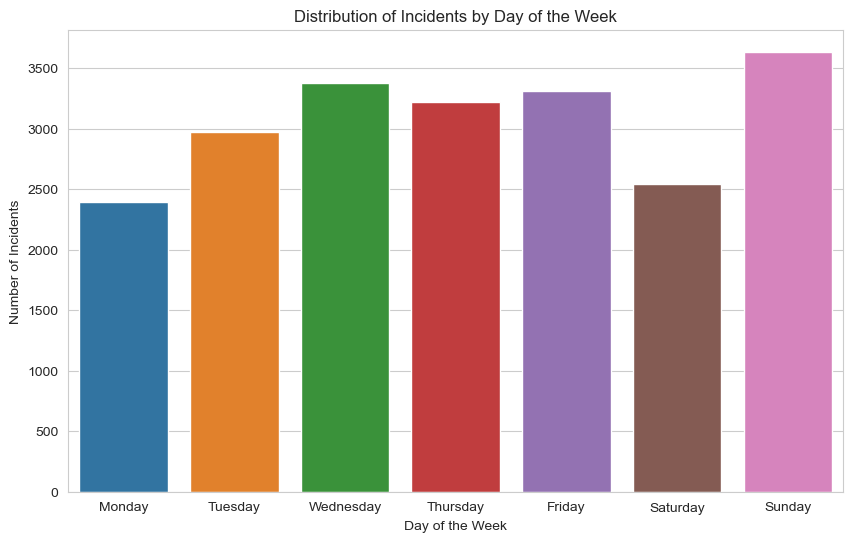

In [47]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of incidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=merged_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='incident_event_type'>

Text(0.5, 1.0, 'Incident Types and Their Frequencies')

Text(0.5, 0, 'Number of Incidents')

Text(0, 0.5, 'Incident Type')

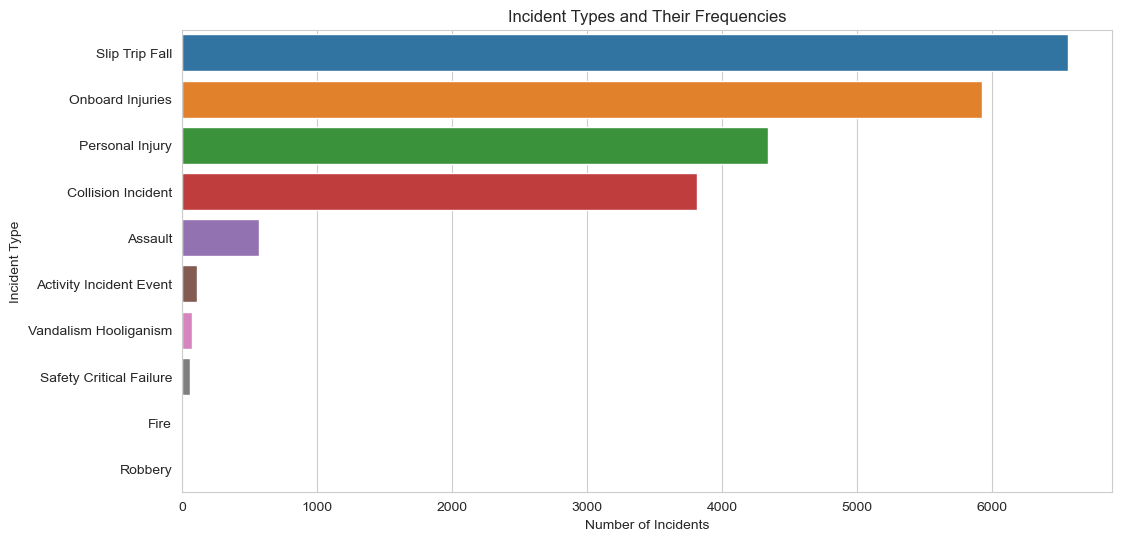

In [48]:
# Plot the distribution of incident types
plt.figure(figsize=(12, 6))
sns.countplot(y='incident_event_type', data=merged_df, order=merged_df['incident_event_type'].value_counts().index)
plt.title('Incident Types and Their Frequencies')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='mean_temp', ylabel='incident_event_type'>

Text(0.5, 1.0, 'Relationship Between Mean Temperature and Number of Incidents')

Text(0.5, 0, 'Mean Temperature (°C)')

Text(0, 0.5, 'Number of Incidents')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(-2.431, 0.71]'),
  Text(1, 0, '(0.71, 3.82]'),
  Text(2, 0, '(3.82, 6.93]'),
  Text(3, 0, '(6.93, 10.04]'),
  Text(4, 0, '(10.04, 13.15]'),
  Text(5, 0, '(13.15, 16.26]'),
  Text(6, 0, '(16.26, 19.37]'),
  Text(7, 0, '(19.37, 22.48]'),
  Text(8, 0, '(22.48, 25.59]'),
  Text(9, 0, '(25.59, 28.7]')])

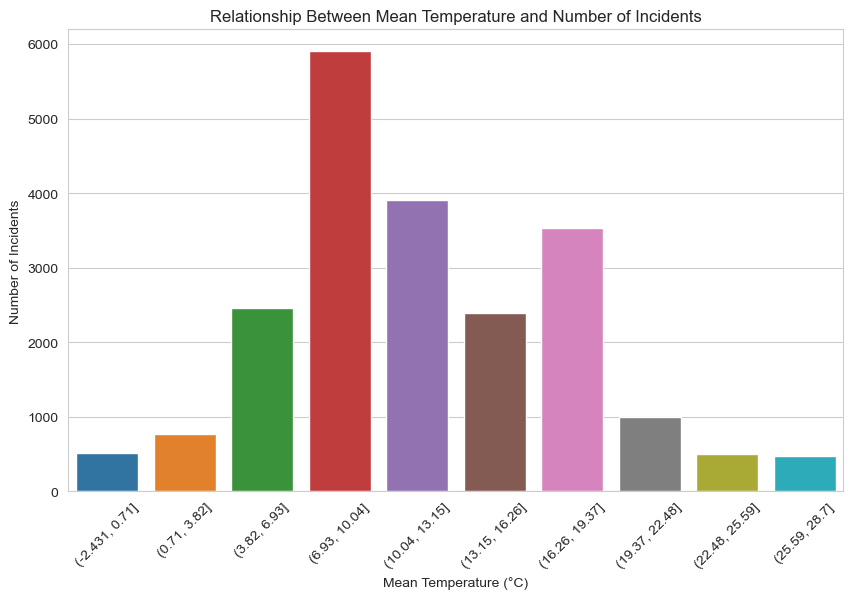

In [49]:
# Group data by mean temperature and count the number of incidents
temp_incidents = merged_df.groupby(pd.cut(merged_df['mean_temp'], bins=10))['incident_event_type'].count().reset_index()

# Plot the relationship between mean temperature and number of incidents
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_temp', y='incident_event_type', data=temp_incidents)
plt.title('Relationship Between Mean Temperature and Number of Incidents')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='borough'>

Text(0.5, 1.0, 'Top 10 Boroughs with the Most Incidents')

Text(0.5, 0, 'Number of Incidents')

Text(0, 0.5, 'Borough')

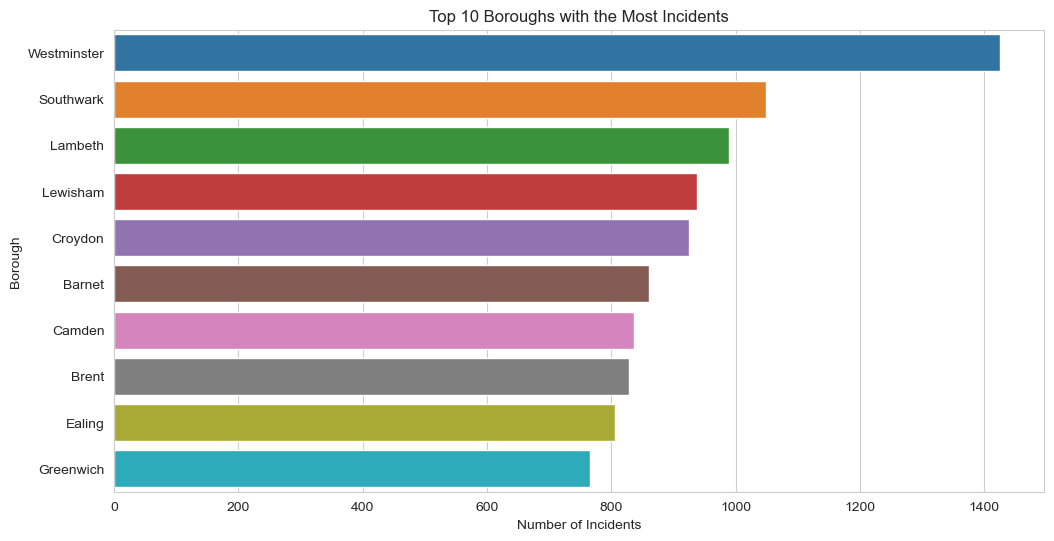

In [50]:
# Plot the top 10 boroughs with the most incidents
plt.figure(figsize=(12, 6))
sns.countplot(y='borough', data=merged_df, order=merged_df['borough'].value_counts().head(10).index)
plt.title('Top 10 Boroughs with the Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Borough')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='victim_category', ylabel='count'>

Text(0.5, 1.0, 'Victim Categories in Incidents')

Text(0.5, 0, 'Victim Category')

Text(0, 0.5, 'Number of Incidents')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Passenger'),
  Text(1, 0, 'Pedestrian'),
  Text(2, 0, 'Bus Driver'),
  Text(3, 0, '3rd Party driver / Occupant'),
  Text(4, 0, 'Cyclist'),
  Text(5, 0, 'Member Of Public'),
  Text(6, 0, 'Motorcyclist'),
  Text(7, 0, 'Operational Staff'),
  Text(8, 0, 'Cyclist '),
  Text(9, 0, 'Conductor'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Contractor Staff'),
  Text(12, 0, 'TfL Staff'),
  Text(13, 0, 'Non-Operational Staff'),
  Text(14, 0, 'Motorcyclist '),
  Text(15, 0, 'Insufficient Data'),
  Text(16, 0, 'Operations staff (other)')])

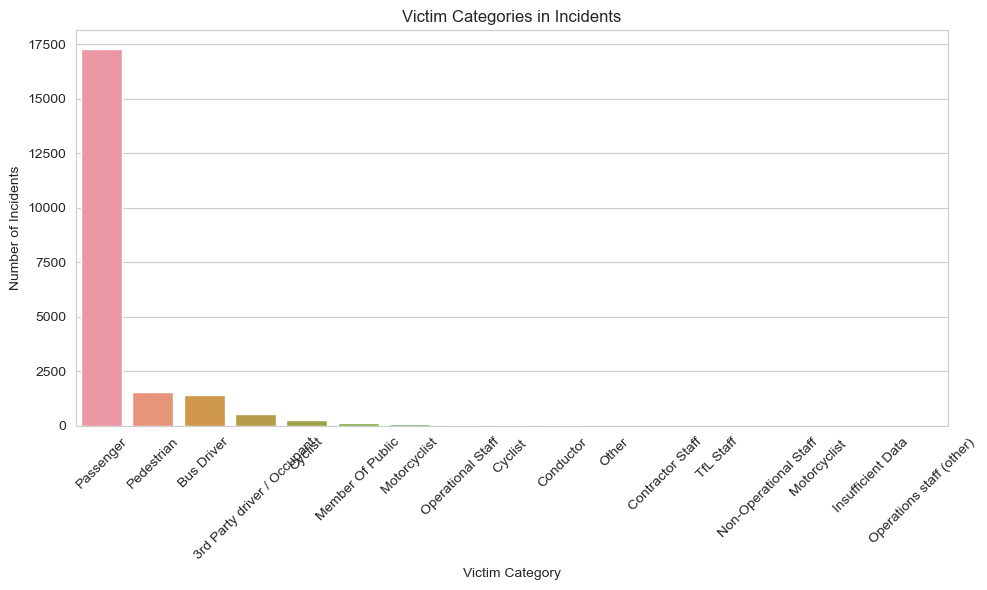

In [53]:
# Plot the distribution of victim categories
plt.figure(figsize=(10, 6))
sns.countplot(x='victim_category', data=merged_df, order=merged_df['victim_category'].value_counts().index)
plt.title('Victim Categories in Incidents')
plt.xlabel('Victim Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()